In [39]:
import numpy as np
import cv2
import skimage.io as io
import skimage
from scipy.signal import convolve2d as conv2
from scipy.fft import fftn, ifftn, fft, ifft,fftshift
from skimage.exposure import equalize_adapthist, rescale_intensity
from matplotlib import pyplot as plt
from skimage import data, color
from skimage.transform import rotate, rescale, resize, downscale_local_mean
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter
from scipy.ndimage.filters import convolve
from skimage.color import rgb2gray, rgba2rgb

In [40]:
def pre_process_image(image):
  image = skimage.img_as_float(rgb2gray(rgba2rgb(image)))
  io.imshow(image)
  plt.show()
  return image

In [41]:
def get_DoG_octave(s, sigma , image):
  gaussian_Octave = []
  DoG_Octave = []
  k = 2 ** (1 / s)
  for i in range(0 , s + 4) :
    blurred_image = gaussian_filter(image , (k ** i) * sigma)
    gaussian_Octave.append(blurred_image)
  for i in range(1 , s + 4):
    DoG = gaussian_Octave[i] - gaussian_Octave[i - 1]
    DoG_Octave.append(DoG)
  return DoG_Octave

In [42]:
def local_extrema_detection(DoG):
  DoG_array = np.array(DoG)
  m , n , p = DoG_array.shape 
  keypoints = []
  keypoint_array = np.zeros((n,p))
  num_kp = 0  # for number of keypoints 
  i = 1
  while i >= 1 and i < (m - 1):
      j = 1
      while j >= 1 and j < (n - 1):
          k = 1
          while k >= 1 and k < (p - 1):
              curr_pixel_value = DoG_array[i , j , k] 
              neighbours_array = DoG_array[i - 1 : i + 2 , j - 1 : j + 2 , k - 1 : k + 2] # 27 neighbour pixels
              neighbours_array[1,1,1] = (neighbours_array[0,1,1] + neighbours_array[2,1,1]) / 2 # preventing middle pixel to be counted as min or max
              min_val = neighbours_array.min()
              max_val = neighbours_array.max()
              if (curr_pixel_value > max_val or curr_pixel_value < min_val):
                  keypoint_array[j - 1 : j + 2 , k - 1 : k + 2] = 1 
                  num_kp += 1
              k += 1
          j += 1
      keypoints.append(keypoint_array)
      keypoint_array = np.zeros((n,p)) # reseting the keypoint array
      i += 1
  print("\nThe number of keypoints are : " , num_kp)
  return keypoints

In [43]:
def extrema_detection_on_grayscale_img(image) :
  dog = get_DoG_octave(7 , 1.9 , image)
  keypoints = local_extrema_detection(dog)
  plt.title("\nImage after Scale-space Extrema Detection :\n")
  io.imshow(np.where(keypoints[0] == 1, np.max(image) , image))
  plt.show()

In [44]:
def extrema_detection_after_rotation(image):
  rotatedImage = rotate(image , 58 , resize = True)
  plt.title("Rotated Image")
  io.imshow(rotatedImage)
  plt.show()
  extrema_detection_on_grayscale_img(rotatedImage)

In [45]:
def extrema_detection_after_upscaling(image):
  upscaledImage = rescale(image , 4 , anti_aliasing = False)
  plt.title("Upscaled Image")
  io.imshow(upscaledImage)
  plt.show()
  extrema_detection_on_grayscale_img(upscaledImage)

In [46]:
def extrema_detection_after_downscaling(image):
  downscaledImage = rescale(image , 0.4 , anti_aliasing = False)
  plt.title("Downscaled Image")
  io.imshow(downscaledImage)
  plt.show()
  extrema_detection_on_grayscale_img(downscaledImage)

In [47]:
def extrema_detection_after_gaussian_blur(image):
  blurredImage = gaussian_filter(image , 3)
  plt.title("Image after adding Gaussian blur")
  io.imshow(blurredImage)
  plt.show()
  extrema_detection_on_grayscale_img(blurredImage)

In [48]:
def extrema_detection_after_gaussian_noise(image):
  noise_img = random_noise(image, mode = 'gaussian', var = 0.01)
  plt.title("Image after adding Gaussian noise")
  io.imshow(noise_img)
  plt.show()
  extrema_detection_on_grayscale_img(noise_img)

In [49]:
def extrema_detection_after_modifications(image):
  # Keypoint detection on grayscale images
  extrema_detection_on_grayscale_img(image)
  
  # Keypoint detection after performing the below tasks on the images :- 
  extrema_detection_after_rotation(image)
  extrema_detection_after_upscaling(image)
  extrema_detection_after_downscaling(image)
  extrema_detection_after_gaussian_blur(image)
  extrema_detection_after_gaussian_noise(image)

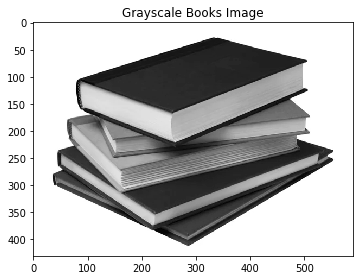


The number of keypoints are :  4797


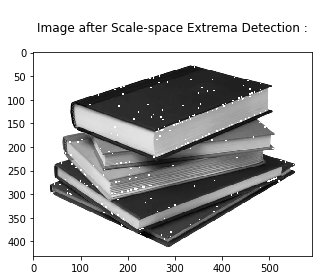

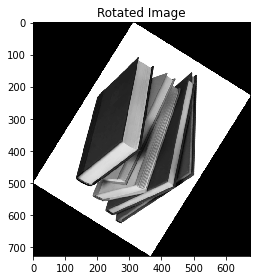


The number of keypoints are :  6329


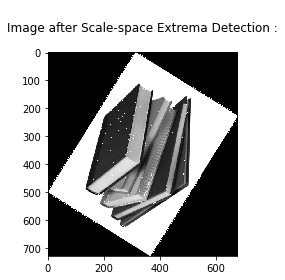

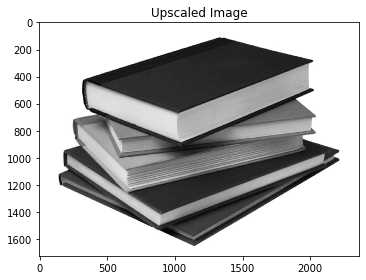


The number of keypoints are :  31273


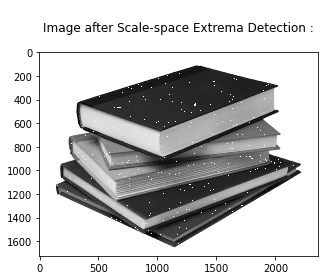

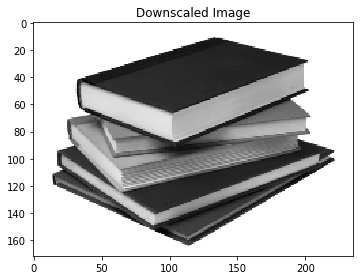


The number of keypoints are :  1845


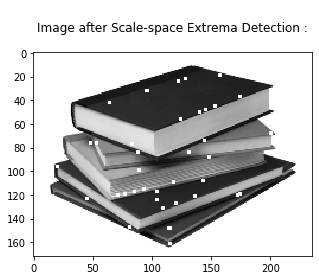

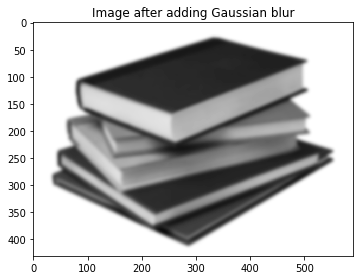


The number of keypoints are :  928


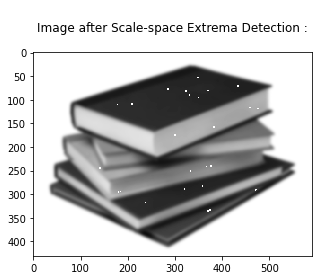

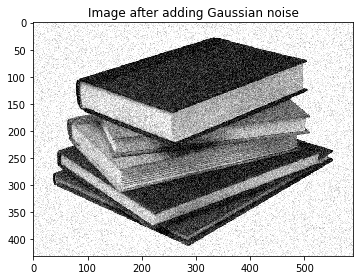


The number of keypoints are :  3298


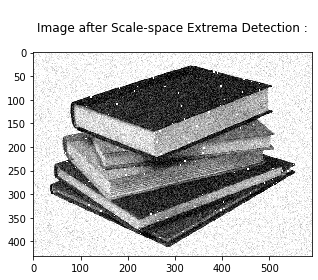

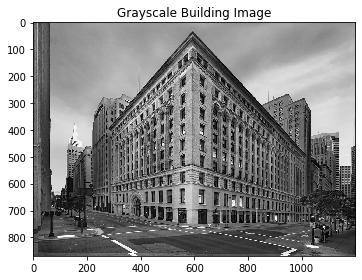


The number of keypoints are :  19924


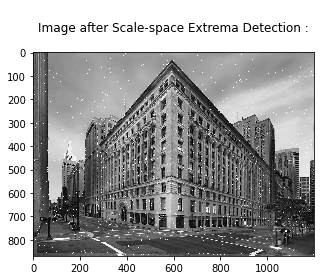

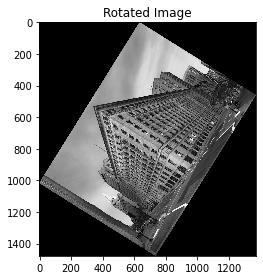


The number of keypoints are :  22521


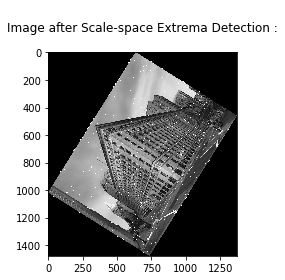

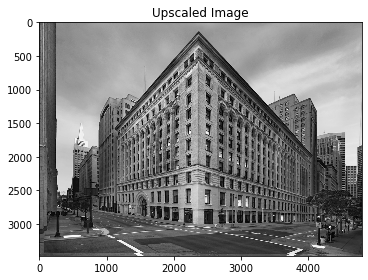


The number of keypoints are :  321057


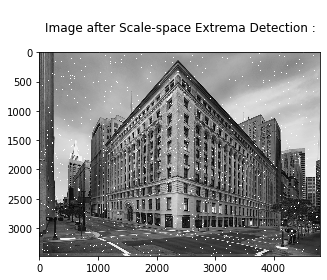

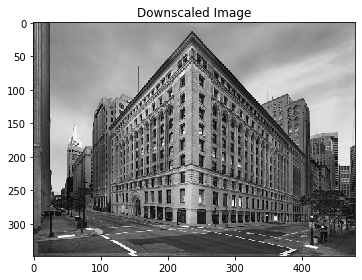


The number of keypoints are :  2943


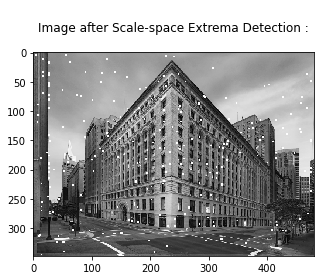

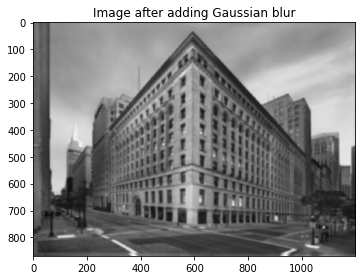


The number of keypoints are :  9251


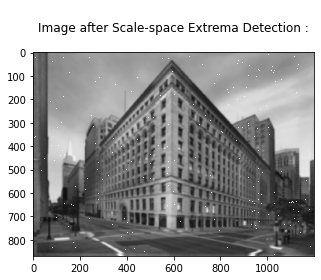

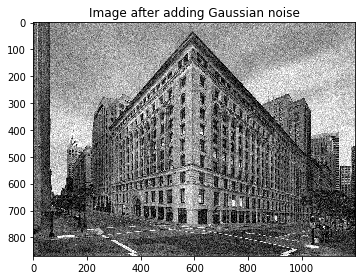


The number of keypoints are :  12349


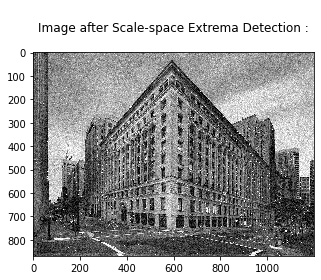

In [50]:
books_image=io.imread("books.png")
building_image=io.imread("building.png")
plt.title("Grayscale Books Image")
books_image = pre_process_image(books_image)
extrema_detection_after_modifications(books_image)
plt.title("Grayscale Building Image")
building_image = pre_process_image(building_image)
extrema_detection_after_modifications(building_image)